In [18]:
#https://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html
#https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/
#https://machinelearningmastery.com/elastic-net-regression-in-python/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, Lars, LarsCV 
from sklearn.metrics import mean_squared_error

#importing data, assigning testing/training 
data = pd.read_csv(r"C:\Users\rehak\Desktop\QSARRegressionDataFinal(1).csv")

train = data[data['Set']== 'Train']
test = data[data['Set']== 'Test']

xtest= test[test.columns[5:27]]
ytest = test.loc[:,'logBCF']

xtrain= train[train.columns[5:27]]
ytrain= train.loc[:,'logBCF']

xdata = data[test.columns[5:27]]
ydata = data.loc[:,'logBCF']

#create many alpha values between 5e-3 and 5e+3
alphas = 10**np.linspace(4,-2,2000)*0.5
print(alphas)  

[5.00000000e+03 4.96556308e+03 4.93136335e+03 ... 5.06959197e-03
 5.03467574e-03 5.00000000e-03]


Best-fitting alpha for Ridge= 0.10462376258350166      Ridge R^2 =  0.7850978080104198     Ridge MSE =  0.41763064303823283     Ridge RMSE =  0.6462434858768271


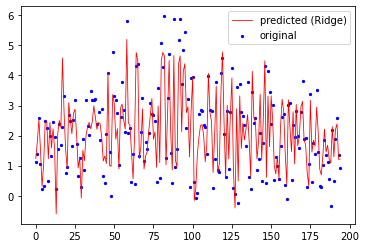

In [19]:
#Ridge

#cross-validate to find the best-fitting alpha out of those in the array (based on the lowest MSE), using the train data
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(xtrain, ytrain) 
a_r = ridgecv.alpha_  #best fitting alpha


#use the best fitting alpha on the test data
ridge = Ridge(alpha = a_r, normalize = True)
ridge.fit(xtest, ytest) #fit the test data
mse_r = mean_squared_error(ytest, ridge.predict(xtest))
rmse_r = mse_r**0.5
r2_r = ridge.score(xtest, ytest)

print("Best-fitting alpha for Ridge=", a_r, "     Ridge R^2 = ", r2_r, "    Ridge MSE = ", mse_r,   "    Ridge RMSE = ", rmse_r )

#plotting
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ridge.predict(xtest), lw=0.8, color="red", label="predicted (Ridge)")
plt.legend()
plt.show()

Best-fitting alpha for Lasso= 0.0014277866820694607      Lasso R^2 =  0.7923473728476319     Lasso MSE =  0.4035421854162694     Lasso RMSE =  0.6352497032004576


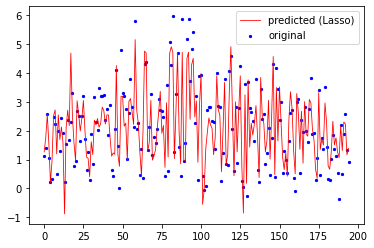

In [20]:
#Lasso

#cross-validate to find the best-fitting alpha, using the train data
lassocv = LassoCV(cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(xtrain, ytrain)
a_l = lassocv.alpha_  #best fitting alpha


#use the best fitting alpha on the test data
lasso = Lasso(alpha = a_l, normalize = True)
lasso.fit(xtest, ytest) #fit the test data
mse_l = mean_squared_error(ytest, lasso.predict(xtest))
rmse_l = mse_l**0.5
r2_l = lasso.score(xtest, ytest)

print("Best-fitting alpha for Lasso=", a_l, "     Lasso R^2 = ", r2_l, "    Lasso MSE = ", mse_l,   "    Lasso RMSE = ", rmse_l )

#Plotiing
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, lasso.predict(xtest), lw=0.8, color="red", label="predicted (Lasso)")
plt.legend()
plt.show()

L1/L2 ratio: 0.05      Best-fitting alpha for ENet= 0.0008720508448953615      ENet R^2 =  0.7859409629107433
L1/L2 ratio: 0.1      Best-fitting alpha for ENet= 0.00043602542244768066      ENet R^2 =  0.8007661399103252
L1/L2 ratio: 0.15      Best-fitting alpha for ENet= 0.0002906836149651207      ENet R^2 =  0.806031407052042
L1/L2 ratio: 0.2      Best-fitting alpha for ENet= 0.0002506616398152368      ENet R^2 =  0.8073998908324889
L1/L2 ratio: 0.25      Best-fitting alpha for ENet= 0.0002650879488109859      ENet R^2 =  0.8069129633428416
L1/L2 ratio: 0.3      Best-fitting alpha for ENet= 0.0002723440111308414      ENet R^2 =  0.8066659322032168
L1/L2 ratio: 0.35      Best-fitting alpha for ENet= 0.00030859093273041355      ENet R^2 =  0.8054013855136115
L1/L2 ratio: 0.39999999999999997      Best-fitting alpha for ENet= 0.00033288965958331695      ENet R^2 =  0.8045351323242684
L1/L2 ratio: 0.44999999999999996      Best-fitting alpha for ENet= 0.00036480171681001867      ENet R^2 = 

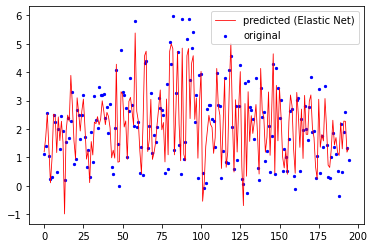

In [21]:
#ENet


#cross-validate to find the best-fitting alpha, using the train data - do so for varying L1/L2 ratios  
#cv value was found to have no impact

L = np.linspace(0.05,1,20)
for j in range (0,len(L)):
    enetcv = ElasticNetCV(l1_ratio = L[j], cv = 10, max_iter = 10000, normalize = True)
    enetcv.fit(xtrain, ytrain)
    a_e = enetcv.alpha_  #best fitting alpha


    #use the best fitting alpha on the test data
    enet = ElasticNet(alpha = a_e, normalize = True)
    enet.fit(xtest, ytest) #fit the test data
    mse_e = mean_squared_error(ytest, enet.predict(xtest))
    rmse_e = mse_e**0.5
    r2_e = enet.score(xtest, ytest)

    print("L1/L2 ratio:", L[j], "     Best-fitting alpha for ENet=", a_e,"     ENet R^2 = ", r2_e) 
#overall best result for L1/L2 = 0.2


enetcv = ElasticNetCV(l1_ratio = 0.2, cv = 10, max_iter = 10000, normalize = True)
enetcv.fit(xtrain, ytrain)
a_e = enetcv.alpha_  #best fitting alpha


#use the best fitting alpha on the test data
enet = ElasticNet(alpha = a_e, normalize = True)
enet.fit(xtest, ytest) #fit the test data
mse_e = mean_squared_error(ytest, enet.predict(xtest))
rmse_e = mse_e**0.5
r2_e = enet.score(xtest, ytest)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Best-fitting alpha for ENet=", a_e, "     ENet R^2 = ", r2_e,"    ENet MSE = ", mse_e,   "    ENet RMSE = ", rmse_e  ) 


x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, enet.predict(xtest), lw=0.8, color="red", label="predicted (Elastic Net)")
plt.legend()
plt.show()